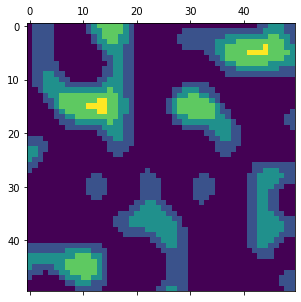

In [1]:
import random as rand
import numpy as np
#rand.seed(1)
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
import math
import gym
from copy import deepcopy
from gym import spaces


def perlin(x, y):
    # permutation table
    p = np.arange(256, dtype=int)
    np.random.shuffle(p)
    p = np.stack([p, p]).flatten()
    # coordinates of the top-left
    xi, yi = x.astype(int), y.astype(int)
    # internal coordinates
    xf, yf = x - xi, y - yi
    # fade factors
    u, v = fade(xf), fade(yf)
    # noise components
    n00 = gradient(p[p[xi] + yi], xf, yf)
    n01 = gradient(p[p[xi] + yi + 1], xf, yf - 1)
    n11 = gradient(p[p[xi + 1] + yi + 1], xf - 1, yf - 1)
    n10 = gradient(p[p[xi + 1] + yi], xf - 1, yf)
    # combine noises
    x1 = lerp(n00, n10, u)
    x2 = lerp(n01, n11, u)  # FIX1: I was using n10 instead of n01
    return lerp(x1, x2, v)  # FIX2: I also had to reverse x1 and x2 here

def lerp(a, b, x):
    "linear interpolation"
    return a + x * (b - a)

def fade(t):
    "6t^5 - 15t^4 + 10t^3"
    return 6 * t**5 - 15 * t**4 + 10 * t**3

def gradient(h, x, y):
    "grad converts h to the right gradient vector and return the dot product with (x,y)"
    vectors = np.array([[0, 1], [0, -1], [1, 0], [-1, 0]])
    g = vectors[h % 4]
    return g[:, :, 0] * x + g[:, :, 1] * y




def generate():
    lin = np.linspace(0, 5, 50, endpoint=False)
    x, y = np.meshgrid(lin, lin)  # FIX3: I thought I had to invert x and y here but it was a mistake
    data = perlin(x, y)
    data = data*7+1
    data = np.round(data)
    data[data <= 0] = 1
    return data

test = generate()
plt.matshow(test)

In [5]:

#Wireless sensor networm combined with autonomous drone swarm and communication reduction
#https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=7391193&casa_token=wZ2spLDNZroAAAAA:YDmwxnfhCvPGV002JGv_1lSta5d7yBgcY3P0YYrw24wKr7-hJWuTdR5tTvuWe1Z4vZgFr-pgs8Y

ViewRange = 2
CommRange = 5#5
AgentAmmount = 5

#double distance = 2/3 as efficient transfer
class Task:
    def __init__(self):
        self.priority = rand.randint(1, 10)
        self.size = rand.randint(100, 1000)



#Vessel
#Constraints: Bandwidth - Num of Chanels - communication distance
#Objective: Energy Reduction - Task priority 
class Drone:
    def __init__(self, x, y, viewRange, commRange, width, height, index, Sea):
        self.x = x
        self.y = y
        self.task = None
        self.viewRange = viewRange
        self.commRange = commRange
        self.observation = [[0]*width]*height
        self.id = index
        #self.seen = np.array([[0]*Sea.width]*Sea.height)
        self.obs = np.array([[0]*Sea.width]*Sea.height)
        self.punish = 0
        self.totalReward = 0
    def getView(self):
        return None

    def getObservation(self, Sea):
        #Get view
        #obs = np.array([[0]*Sea.width]*Sea.height)
        reward = 0 
        for i in range(self.y-self.viewRange, self.y+self.viewRange):
            for j in range(self.x-self.viewRange, self.x+self.viewRange):
                if i < 50 and i >= 0  and j < 50 and j >= 0:
                    if Sea.board[i][j] == 0:
                        self.obs[i][j] = Sea.priorityMap[i][j] + 8
                    else:
                        self.obs[i][j] = Sea.board[i][j]

                    if Sea.seen[i][j] == 0:
                        Sea.seen[i][j] = 1
                        reward += 1
                        self.totalReward += Sea.priorityMap[i][j]
        #reward += self.punish
        res = deepcopy(self.obs)
        #make them seperate
        res[self.y][self.x] = 3 + self.id
        reward = float(self.totalReward)/Sea.maxReward
        #reward = -1/(10*(reward - 1.1))
        reward = reward**2
        return res, reward

    def move(self,x, y, see):
        x = x + self.x
        y = y + self.y

        self.punish = 0

        if (x < 50 and x >= 0 and y < 50 and y >= 0) and (see.board[y][x] == 0 or see.board[y][x] == 2 or see.board[y][x] == -2) :
            self.x = x
            self.y = y
        else:
            #punishment
            self.punish -= 4

    
    def addData(self, drone):
        pass
    def setData(self, obs):
        self.observation = abs
#Constraints: Bandwidth, Num of Chanels
#Objective Explore the sea
class Ship:
    def __init__(self, x, y, bandwidth):
        self.x = x
        self.y = y
        self.bandwidth = bandwidth


#Actions move up down left right 
class Sea:

    def __init__(self):#, width, height):
        self.width = 50#width
        self.height =50# height

        self.observe_dim = 50*50#env.observation_space[0].shape[0]
        self.action_num = 4
        self.max_step = 200
        self.step_count = 0 
        self.state_dim = 50*50
        self.action_dim = 4
        self.target_return = 50*50
        self.env_num = 500
        self.if_discrete = True
        self.discrete_action_input = True
        self.discrete_action_space = True
        self.env_name = "Sea"
        self.reward_range = (-200*4, 50*50)
        #self.objects = objects
        #int array -2 = dead zone (ie no communication) -1 = object 0 = sea 1 = ship 2 = drone
        self.board = np.array( [ [0]*self.width]*self.height )
        #for obj in objects:
        #    self.board[obj.y][obj.x] = -1

        #for i in range(self.height):
        #    for j in range(self.width):
        #        rock = rand.randint(0, 30)
        #        if(rock == 0):
        #            self.board[i][j] = -1


        self.observation_space = []
        self.action_space = []
        self.shared_observation_space = []


        for i in range(5):

            self.action_space.append(spaces.Discrete(4, start=0))
            self.observation_space.append(spaces.Box(low=-5, high=9, shape=(50*50,)))
            
        self.share_observation_space = [spaces.Box(low=-5, high=9, shape=(50*50*5,))]#[spaces.Discrete(50*50*5, start=-5)] 

        self.cmap = ListedColormap([ 'k', 'b'])

    def AddShip(self, ship):
        self.ship = ship
        self.board[ship.y][ship.x] = 2
        for i in range(ship.y - 2, ship.y+2):
            for j in range(ship.x - 2, ship.x + 2):
                if i >= 0 and j >= 0 and i < self.height and j < self.width and self.board[i][j] == -1:
                    self.board[i][j] = 0

    def display(self):
        newBoard = np.copy(self.board)
        if ( hasattr(self, 'ship')):
            newBoard[self.ship.y][self.ship.x] = 2
            #self.calculateDeadZone2(newBoard)
            self.cmap = ListedColormap([ 'k',  'b', 'g', 'y', 'r'])

        for drone in self.drones:
            newBoard[drone.y][drone.x] = 3

        plt.matshow(newBoard, cmap=self.cmap)

    def interestMap(self):
        interest = [[0]*self.width]*self.height
        samples = np.random.multivariate_normal([-0.5, -0.5], [[1, 0],[0, 1]], 50)
        huh  = np.reshape(samples, (10,10))
        print(huh)
        plt.close()
        plt.matshow(huh)

    def reset(self):
        self.board = np.array( [ [0]*self.width]*self.height )
        #for obj in objects:
        #    self.board[obj.y][obj.x] = -1

        #for i in range(self.height):
        #    for j in range(self.width):
        #        rock = rand.randint(0, 30)
        #        if(rock == 0):
        #            self.board[i][j] = -1
        self.priorityMap = generate()
        self.maxReward = np.sum(self.priorityMap)
        shipx = rand.randint(0, 49)
        shipy = rand.randint(1, 49)
        ship = Ship(shipx, shipy, 100)
        self.AddShip(ship)
        self.seen = np.array([[0]*50]*50)
        self.drones = []
        self.step_count = 0
        for i in range(AgentAmmount):
            self.drones.append(Drone(shipx, shipy-1,ViewRange, CommRange, self.width, self.height, i, self))
        observations, rewards = self.getObservation()

        return observations

    def step(self, actions):
        droneIdx= 0
        for act in actions:
            if int(act[0]) == 1:
                self.drones[droneIdx].move(1,0, self)
            elif int(act[1]) == 1:
                self.drones[droneIdx].move(-1,0, self)
            elif int(act[2]) == 1:
                self.drones[droneIdx].move(0,1, self)
            elif int(act[3]) == 1:
                self.drones[droneIdx].move(0, -1, self)
            else:
                print("Im not meantr to thbe there")
            droneIdx+= 1
                
                
        #count  = [0] * AgentAmmount
        #for i in range(self.height):
        #    for j in range(self.width):
        #        for drone in self.drones:
        #            if drone.seen[i][j] == 1:
        #                count[drone.id] += 1
                        
        #reward = count / float(self.width*self.height)
        #reward = [t/float(self.width*self.height) for t in count]


        observations, rewards = self.getObservation()
        done = False
        if(self.step_count >= self.max_step):
            done = True
        return observations, rewards, [done]*AgentAmmount, None

    def getObservation(self):
        currentIndex = 1
        droneConnection = [0]*AgentAmmount

        for drone in self.drones:
            
            for connectDrone in self.drones:
                if drone.id == connectDrone.id:
                    continue
                if (droneConnection[drone.id] == 0 or droneConnection[drone.id] != droneConnection[connectDrone.id]) \
                            and math.sqrt( (drone.x - connectDrone.x)**2 + (drone.y - connectDrone.y)**2 ) < CommRange:
                    #do stuff
                    if droneConnection[drone.id] == 0 and droneConnection[connectDrone.id] == 0:
                        droneConnection[drone.id] = currentIndex
                        droneConnection[connectDrone.id] = currentIndex
                        currentIndex += 1
                    elif droneConnection[drone.id] != 0 and droneConnection[connectDrone.id] != 0:
                        swap = droneConnection[connectDrone.id]
                        for i in droneConnection:
                            if i == swap:
                                i = droneConnection[drone.id]
                    else:
                        if(droneConnection[drone.id] == 0):
                            droneConnection[drone.id] = droneConnection[connectDrone.id]
                        else:
                            droneConnection[connectDrone.id] = droneConnection[drone.id]

        for t in range(len(droneConnection)):
            if droneConnection[t] == 0:
                droneConnection[t] = currentIndex
                currentIndex += 1

        obsDict = {}
        rewardList = [0] * AgentAmmount
        index = 0
        for i in droneConnection:

            values, reward = self.drones[index].getObservation(self)

            if str(i) in obsDict:
                values = np.array(values).flatten()
                curr = obsDict[str(i)]
                
                for i in range(len(curr)):
                    
                    if(curr[i] == 1 and values[i] != 0):
                        curr[i] = values[i]
                    if(curr[i] == 0):
                        curr[i] = values[i]

            else:
                obsDict[str(i)] = np.array(values).flatten()
            
            rewardList[index]= reward
            index += 1

        observations = []


        for i in droneConnection:
            observations.append(obsDict[str(i)])

        for index, i in enumerate(observations):
            t = deepcopy(i)
            t[t == 3] = 1
            t[ t == 4] = 1
            t[t == 5 ] = 1
            t[t == 6 ] = 1
            t[ t == 7 ] = 1
            t[ t == 8 ] = 1
            self.drones[index].obs = np.reshape(t, (50,50))


        return observations, rewardList
class Object:
    def __init__(self, x, y):
        self.x = x
        self.y = y 

see = Sea()#50, 50)
#see.reset()
#obs, reward, _, _ = see.step([[0,1], [1,0]])
#print(obs[0])
#plt.matshow( np.reshape(obs[0], (50,50)) )
#plt.matshow( np.reshape(obs[1], (50,50)) )
#see.display()

#print(reward)



In [7]:
import onpolicy
#from onpolicy.runner.separated.mpe_runner import MPERunner
from onpolicy.envs.env_wrappers import SubprocVecEnv, DummyVecEnv
import torch

from onpolicy.config import get_config

import wandb
import socket


import time
import wandb
import os
import numpy as np
from itertools import chain
import torch

from onpolicy.utils.util import update_linear_schedule
from onpolicy.runner.separated.base_runner import Runner
import imageio

def _t2n(x):
    return x.detach().cpu().numpy()

class MPERunner(Runner):
    def __init__(self, config):
        super(MPERunner, self).__init__(config)
        self.noise_vector = None
        self.reset_noise()

    def reset_noise(self):
        # init noise
        if self.noise_vector is None:
            self.noise_vector = []
            for i in range(self.num_agents):#self.args.num_agents):
                self.noise_vector.append(np.random.randn(4)*1)# self.args.noise_dim) * self.args.sigma)
            self.noise_vector = np.array(self.noise_vector)
        else:
            # shuffle noise
            np.random.shuffle(self.noise_vector)


    def run(self):
        self.warmup()   

        start = time.time()
        episodes = int(self.num_env_steps) // self.episode_length // self.n_rollout_threads
        total_reward = 0
        for episode in range(episodes):
            obs = self.envs.reset()
            print(f"Episode {episode}")
            if self.use_linear_lr_decay:
                for agent_id in range(self.num_agents):
                    self.trainer[agent_id].policy.lr_decay(episode, episodes)

            episode_reward_total = 0
            for step in range(self.episode_length):
                # Sample actions
                values, actions, action_log_probs, rnn_states, rnn_states_critic, actions_env = self.collect(step)
                    
                # Obser reward and next obs
                obs, rewards, dones, infos = self.envs.step(actions_env)

                data = obs, rewards, dones, infos, values, actions, action_log_probs, rnn_states, rnn_states_critic 
                episode_reward_total += np.sum(rewards)

                # insert data into buffer
                self.insert(data)

            self.reset_noise()
            endResult = 0
            for drone in self.envs.envs[0].drones:
                endResult += drone.totalReward
            
            print(f"Priority Sum Of Visited {endResult}")
            print(f"Priority Total {self.envs.envs[0].maxReward}")
            print(f"Episode Reward: {episode_reward_total}")
            total_reward = total_reward * 0.9 + episode_reward_total * 0.1
            print(f"Smoothed Avg Reward: {total_reward}")
            visited = np.sum(self.envs.envs[0].seen)
            print(f"Visited: {visited}")
            # compute return and update network
            self.compute()
            train_infos = self.train()#self.noise_vector)
            
            # post process
            total_num_steps = (episode + 1) * self.episode_length * self.n_rollout_threads
            
            # save model
            if (episode % self.save_interval == 0 or episode == episodes - 1):
                self.save()

            # log information
            if episode % self.log_interval == 0:
                end = time.time()
                print("\n Scenario {} Algo {} Exp {} updates {}/{} episodes, total num timesteps {}/{}, FPS {}.\n"
                        .format(self.all_args.scenario_name,
                                self.algorithm_name,
                                self.experiment_name,
                                episode,
                                episodes,
                                total_num_steps,
                                self.num_env_steps,
                                int(total_num_steps / (end - start))))

                if self.env_name == "MPE":
                    for agent_id in range(self.num_agents):
                        idv_rews = []
                        for info in infos:
                            if 'individual_reward' in info[agent_id].keys():
                                idv_rews.append(info[agent_id]['individual_reward'])
                        train_infos[agent_id].update({'individual_rewards': np.mean(idv_rews)})
                        train_infos[agent_id].update({"average_episode_rewards": np.mean(self.buffer[agent_id].rewards) * self.episode_length})
                self.log_train(train_infos, total_num_steps)

            # eval
            if episode % self.eval_interval == 0 and self.use_eval:
                self.eval(total_num_steps)

    def warmup(self):
        # reset env
        obs = self.envs.reset()

        share_obs = []
        for o in obs:
            share_obs.append(list(chain(*o)))
        share_obs = np.array(share_obs)

        for agent_id in range(self.num_agents):
            if not self.use_centralized_V:
                share_obs = np.array(list(obs[:, agent_id]))
            self.buffer[agent_id].share_obs[0] = share_obs.copy()
            self.buffer[agent_id].obs[0] = np.array(list(obs[:, agent_id])).copy()

    @torch.no_grad()
    def collect(self, step):
        values = []
        actions = []
        temp_actions_env = []
        action_log_probs = []
        rnn_states = []
        rnn_states_critic = []

        for agent_id in range(self.num_agents):
            self.trainer[agent_id].prep_rollout()
            value, action, action_log_prob, rnn_state, rnn_state_critic \
                = self.trainer[agent_id].policy.get_actions(self.buffer[agent_id].share_obs[step],
                                                            self.buffer[agent_id].obs[step],
                                                            self.buffer[agent_id].rnn_states[step],
                                                            self.buffer[agent_id].rnn_states_critic[step],
                                                            self.buffer[agent_id].masks[step])
            # [agents, envs, dim]
            values.append(_t2n(value))
            action = _t2n(action)
            # rearrange action
            if self.envs.action_space[agent_id].__class__.__name__ == 'MultiDiscrete':
                for i in range(self.envs.action_space[agent_id].shape):
                    uc_action_env = np.eye(self.envs.action_space[agent_id].high[i]+1)[action[:, i]]
                    if i == 0:
                        action_env = uc_action_env
                    else:
                        action_env = np.concatenate((action_env, uc_action_env), axis=1)
            elif self.envs.action_space[agent_id].__class__.__name__ == 'Discrete':
                action_env = np.squeeze(np.eye(self.envs.action_space[agent_id].n)[action], 1)
            else:
                raise NotImplementedError

            actions.append(action)
            temp_actions_env.append(action_env)
            action_log_probs.append(_t2n(action_log_prob))
            rnn_states.append(_t2n(rnn_state))
            rnn_states_critic.append( _t2n(rnn_state_critic))

        # [envs, agents, dim]
        actions_env = []
        for i in range(self.n_rollout_threads):
            one_hot_action_env = []
            for temp_action_env in temp_actions_env:
                one_hot_action_env.append(temp_action_env[i])
            actions_env.append(one_hot_action_env)

        values = np.array(values).transpose(1, 0, 2)
        actions = np.array(actions).transpose(1, 0, 2)
        action_log_probs = np.array(action_log_probs).transpose(1, 0, 2)
        rnn_states = np.array(rnn_states).transpose(1, 0, 2, 3)
        rnn_states_critic = np.array(rnn_states_critic).transpose(1, 0, 2, 3)

        return values, actions, action_log_probs, rnn_states, rnn_states_critic, actions_env

    def insert(self, data):
        obs, rewards, dones, infos, values, actions, action_log_probs, rnn_states, rnn_states_critic = data
        

        #rnn_states[dones == True] = np.zeros(((dones == True).sum(), self.recurrent_N, self.hidden_size), dtype=np.float32)
        if(dones.any()):
            rnn_states = np.zeros((5, self.recurrent_N, self.hidden_size), dtype=np.float32)
            rnn_states_critic= np.zeros((5, self.recurrent_N, self.hidden_size), dtype=np.float32)
        #rnn_states_critic[dones == True] = np.zeros(((dones == True).sum(), self.recurrent_N, self.hidden_size), dtype=np.float32)
        masks = np.ones((self.n_rollout_threads, self.num_agents, 1), dtype=np.float32)
        #masks[dones == True] = np.zeros(((dones == True).sum(), 1), dtype=np.float32)
        if(dones.any()):
            masks = np.zeros((5, 1), dtype=np.float32)
        share_obs = []
        for o in obs:
            share_obs.append(list(chain(*o)))
        share_obs = np.array(share_obs)

        for agent_id in range(self.num_agents):
            if not self.use_centralized_V:
                share_obs = np.array(list(obs[:, agent_id]))

            self.buffer[agent_id].insert(share_obs,
                                        np.array(list(obs[:, agent_id])),
                                        rnn_states[:, agent_id],
                                        rnn_states_critic[:, agent_id],
                                        actions[:, agent_id],
                                        action_log_probs[:, agent_id],
                                        values[:, agent_id],
                                        rewards[:, agent_id],
                                        masks[:, agent_id])

    @torch.no_grad()
    def eval(self, total_num_steps):
        eval_episode_rewards = []
        eval_obs = self.eval_envs.reset()

        eval_rnn_states = np.zeros((self.n_eval_rollout_threads, self.num_agents, self.recurrent_N, self.hidden_size), dtype=np.float32)
        eval_masks = np.ones((self.n_eval_rollout_threads, self.num_agents, 1), dtype=np.float32)

        for eval_step in range(self.episode_length):
            eval_temp_actions_env = []
            for agent_id in range(self.num_agents):
                self.trainer[agent_id].prep_rollout()
                eval_action, eval_rnn_state = self.trainer[agent_id].policy.act(np.array(list(eval_obs[:, agent_id])),
                                                                                eval_rnn_states[:, agent_id],
                                                                                eval_masks[:, agent_id],
                                                                                deterministic=True)

                eval_action = eval_action.detach().cpu().numpy()
                # rearrange action
                if self.eval_envs.action_space[agent_id].__class__.__name__ == 'MultiDiscrete':
                    for i in range(self.eval_envs.action_space[agent_id].shape):
                        eval_uc_action_env = np.eye(self.eval_envs.action_space[agent_id].high[i]+1)[eval_action[:, i]]
                        if i == 0:
                            eval_action_env = eval_uc_action_env
                        else:
                            eval_action_env = np.concatenate((eval_action_env, eval_uc_action_env), axis=1)
                elif self.eval_envs.action_space[agent_id].__class__.__name__ == 'Discrete':
                    eval_action_env = np.squeeze(np.eye(self.eval_envs.action_space[agent_id].n)[eval_action], 1)
                else:
                    raise NotImplementedError

                eval_temp_actions_env.append(eval_action_env)
                eval_rnn_states[:, agent_id] = _t2n(eval_rnn_state)
                
            # [envs, agents, dim]
            eval_actions_env = []
            for i in range(self.n_eval_rollout_threads):
                eval_one_hot_action_env = []
                for eval_temp_action_env in eval_temp_actions_env:
                    eval_one_hot_action_env.append(eval_temp_action_env[i])
                eval_actions_env.append(eval_one_hot_action_env)

            # Obser reward and next obs
            eval_obs, eval_rewards, eval_dones, eval_infos = self.eval_envs.step(eval_actions_env)
            eval_episode_rewards.append(eval_rewards)

            eval_rnn_states[eval_dones == True] = np.zeros(((eval_dones == True).sum(), self.recurrent_N, self.hidden_size), dtype=np.float32)
            eval_masks = np.ones((self.n_eval_rollout_threads, self.num_agents, 1), dtype=np.float32)
            eval_masks[eval_dones == True] = np.zeros(((eval_dones == True).sum(), 1), dtype=np.float32)

        eval_episode_rewards = np.array(eval_episode_rewards)
        
        eval_train_infos = []
        for agent_id in range(self.num_agents):
            eval_average_episode_rewards = np.mean(np.sum(eval_episode_rewards[:, :, agent_id], axis=0))
            eval_train_infos.append({'eval_average_episode_rewards': eval_average_episode_rewards})
            print("eval average episode rewards of agent%i: " % agent_id + str(eval_average_episode_rewards))

        self.log_train(eval_train_infos, total_num_steps)  

    @torch.no_grad()
    def render(self):        
        all_frames = []
        for episode in range(self.all_args.render_episodes):
            episode_rewards = []
            obs = self.envs.reset()
            if self.all_args.save_gifs:
                image = self.envs.render('rgb_array')[0][0]
                all_frames.append(image)

            rnn_states = np.zeros((self.n_rollout_threads, self.num_agents, self.recurrent_N, self.hidden_size), dtype=np.float32)
            masks = np.ones((self.n_rollout_threads, self.num_agents, 1), dtype=np.float32)

            for step in range(self.episode_length):
                calc_start = time.time()
                
                temp_actions_env = []
                for agent_id in range(self.num_agents):
                    if not self.use_centralized_V:
                        share_obs = np.array(list(obs[:, agent_id]))
                    self.trainer[agent_id].prep_rollout()
                    action, rnn_state = self.trainer[agent_id].policy.act(np.array(list(obs[:, agent_id])),
                                                                        rnn_states[:, agent_id],
                                                                        masks[:, agent_id],
                                                                        deterministic=True)

                    action = action.detach().cpu().numpy()
                    # rearrange action
                    if self.envs.action_space[agent_id].__class__.__name__ == 'MultiDiscrete':
                        for i in range(self.envs.action_space[agent_id].shape):
                            uc_action_env = np.eye(self.envs.action_space[agent_id].high[i]+1)[action[:, i]]
                            if i == 0:
                                action_env = uc_action_env
                            else:
                                action_env = np.concatenate((action_env, uc_action_env), axis=1)
                    elif self.envs.action_space[agent_id].__class__.__name__ == 'Discrete':
                        action_env = np.squeeze(np.eye(self.envs.action_space[agent_id].n)[action], 1)
                    else:
                        raise NotImplementedError

                    temp_actions_env.append(action_env)
                    rnn_states[:, agent_id] = _t2n(rnn_state)
                   
                # [envs, agents, dim]
                actions_env = []
                for i in range(self.n_rollout_threads):
                    one_hot_action_env = []
                    for temp_action_env in temp_actions_env:
                        one_hot_action_env.append(temp_action_env[i])
                    actions_env.append(one_hot_action_env)

                # Obser reward and next obs
                obs, rewards, dones, infos = self.envs.step(actions_env)
                episode_rewards.append(rewards)

                rnn_states[dones == True] = np.zeros(((dones == True).sum(), self.recurrent_N, self.hidden_size), dtype=np.float32)
                masks = np.ones((self.n_rollout_threads, self.num_agents, 1), dtype=np.float32)
                masks[dones == True] = np.zeros(((dones == True).sum(), 1), dtype=np.float32)

                if self.all_args.save_gifs:
                    image = self.envs.render('rgb_array')[0][0]
                    all_frames.append(image)
                    calc_end = time.time()
                    elapsed = calc_end - calc_start
                    if elapsed < self.all_args.ifi:
                        time.sleep(self.all_args.ifi - elapsed)

            episode_rewards = np.array(episode_rewards)
            for agent_id in range(self.num_agents):
                average_episode_rewards = np.mean(np.sum(episode_rewards[:, :, agent_id], axis=0))
                print("eval average episode rewards of agent%i: " % agent_id + str(average_episode_rewards))
        
        if self.all_args.save_gifs:
            imageio.mimsave(str(self.gif_dir) + '/render.gif', all_frames, duration=self.all_args.ifi)


envs = DummyVecEnv([Sea])

num_agents = 5
device = torch.device("cuda:0")
run_dir = "ckpt"

parser = get_config()

parser.add_argument('--scenario_name', type=str,
                        default='tewzt', help="Which scenario to run on")
parser.add_argument('--num_agents', type=int,
                    default=5, help="number of players")

all_args = parser.parse_known_args("")[0]
all_args.algorithm_name = "na-mappo"
all_args.num_env_steps=5000000
all_args.use_wandb = True
all_args.use_eval = True
all_args.log_interval = 50
all_args.eval_episodes = 50
all_args.eval_interval = 50
all_args.hidden_size = 1024
all_args.layer_N = 10
all_args.save_interval = 40
all_args.ppo_epoch = 15
all_args.num_mini_batch = 3

#all_args.use_adv_noise = True
#all_args.use_value_noise = True
#all_args.alpha = 0.1
#all_args.use_centralized_V = False

config = {
        "all_args": all_args,
        "envs": envs,
        "eval_envs": envs,
        "num_agents": num_agents,
        "device": device,
        "run_dir": run_dir
    }

run = wandb.init(config=all_args,
                         project="test",#all_args.env_name,
                         entity="17donj",#all_args.user_name,
                         notes=socket.gethostname(),
                         name=str(all_args.algorithm_name) + "_" +
                         str(all_args.experiment_name) +
                         "_seed" + str(all_args.seed) + "_priorityZones_noNoise",
                         group=all_args.scenario_name,
                         dir=str(run_dir),
                         job_type="training",
                         reinit=True)

runner = MPERunner(config)
runner.run()


run.finish()

Episode 0
Priority Sum Of Visited 376.0
Priority Total 3923.0
Episode Reward: 0.2129993582166624
Smoothed Avg Reward: 0.02129993582166624
Visited: 309

 Scenario tewzt Algo na-mappo Exp check updates 0/781 episodes, total num timesteps 6400/5000000, FPS 160.

eval average episode rewards of agent0: 0.056671466202044773
eval average episode rewards of agent1: 0.7208111350821151
eval average episode rewards of agent2: 0.026998106672114365
eval average episode rewards of agent3: 0.5530169616924578
eval average episode rewards of agent4: 0.027524071094258053
Episode 1
Priority Sum Of Visited 676.0
Priority Total 4457.0
Episode Reward: 0.352800919855973
Smoothed Avg Reward: 0.05445003422509692
Visited: 409
Episode 2
Priority Sum Of Visited 1190.0
Priority Total 4329.0
Episode Reward: 1.9999909286118571
Smoothed Avg Reward: 0.24900412366377295
Visited: 668
Episode 3
Priority Sum Of Visited 867.0
Priority Total 4253.0
Episode Reward: 0.942047961165876
Smoothed Avg Reward: 0.31830850741398325


KeyboardInterrupt: 